#### Feature Enginering practice

In [75]:
import pandas as pd

In [76]:
df=pd.read_csv('loan_approved.csv')

In [77]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### handle missin values
1. check if there are null values
2. use fillna and fill it

In [79]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [80]:
df.isnull().sum().sum()

np.int64(149)

In [81]:
df[df.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [82]:
df.replace(["?","NA","N/A",""," ","null"], pd.NA, inplace=True)

In [83]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [84]:
(df.isnull().sum()/len(df))*100

Loan_ID                   0.000000
Gender                    2.117264
Married                   0.488599
Dependents                2.442997
Education                 0.000000
Self_Employed             5.211726
ApplicantIncome           0.000000
CoapplicantIncome         0.000000
LoanAmount                3.583062
Loan_Amount_Term          2.280130
Credit_History            8.143322
Property_Area             0.000000
Loan_Status (Approved)    0.000000
dtype: float64

In [85]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [86]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [87]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [88]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0]);

In [89]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [90]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [91]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [92]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [93]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

#### Handling outliers

In [94]:
col='ApplicantIncome'

Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR

print(lower_limit)
print(upper_limit)

-1498.75
10171.25


In [95]:
print("before handling outlier",df.loc[9,"ApplicantIncome"]>upper_limit)
print(df.loc[9,"ApplicantIncome"])

before handling outlier True
12841


In [96]:
iqr_outliers = df[(df[col]<lower_limit) | (df[col]>upper_limit)]
print(iqr_outliers.ApplicantIncome)

9      12841
34     12500
54     11500
67     10750
102    13650
106    11417
115    14583
119    10408
126    23803
128    10513
130    20166
138    14999
144    11757
146    14866
155    39999
171    51763
183    33846
185    39147
191    12000
199    11000
254    16250
258    14683
271    11146
278    14583
284    20667
308    20233
324    15000
333    63337
369    19730
370    15759
409    81000
424    14880
432    12876
438    10416
443    37719
467    16692
475    16525
478    16667
483    10833
487    18333
493    17263
506    20833
509    13262
525    17500
533    11250
534    18165
561    19484
572    16666
594    16120
604    12000
Name: ApplicantIncome, dtype: int64


In [97]:
df['Capped_'+col]=df[col].clip(lower_limit,upper_limit)

In [98]:
print(df[['ApplicantIncome','Capped_ApplicantIncome']])

     ApplicantIncome  Capped_ApplicantIncome
0               5849                  5849.0
1               4583                  4583.0
2               3000                  3000.0
3               2583                  2583.0
4               6000                  6000.0
..               ...                     ...
609             2900                  2900.0
610             4106                  4106.0
611             8072                  8072.0
612             7583                  7583.0
613             4583                  4583.0

[614 rows x 2 columns]


In [99]:
print(df.loc[9,['ApplicantIncome','Capped_ApplicantIncome']])

ApplicantIncome              12841
Capped_ApplicantIncome    10171.25
Name: 9, dtype: object


#### Median Replacement

In [100]:
median_value = df[col].median()
df['Median_Replaced_'+col]=df[col].mask(
    (df[col]<lower_limit)|(df[col]>upper_limit), median_value
)

In [101]:
print(df[['ApplicantIncome','Median_Replaced_ApplicantIncome']])

     ApplicantIncome  Median_Replaced_ApplicantIncome
0               5849                           5849.0
1               4583                           4583.0
2               3000                           3000.0
3               2583                           2583.0
4               6000                           6000.0
..               ...                              ...
609             2900                           2900.0
610             4106                           4106.0
611             8072                           8072.0
612             7583                           7583.0
613             4583                           4583.0

[614 rows x 2 columns]


In [102]:
print(df.loc[9,['ApplicantIncome','Median_Replaced_ApplicantIncome']])

ApplicantIncome                     12841
Median_Replaced_ApplicantIncome    3812.5
Name: 9, dtype: object


#### 2. Handling outliers using z score 

In [103]:
from scipy import stats

df['zscore']=stats.zscore(df['ApplicantIncome'])
print(df['zscore'])
zscore_outliers=df[abs(df['zscore']>3)]
print(zscore_outliers.ApplicantIncome)

0      0.072991
1     -0.134412
2     -0.393747
3     -0.462062
4      0.097728
         ...   
609   -0.410130
610   -0.212557
611    0.437174
612    0.357064
613   -0.134412
Name: zscore, Length: 614, dtype: float64
126    23803
155    39999
171    51763
183    33846
185    39147
333    63337
409    81000
443    37719
Name: ApplicantIncome, dtype: int64


In [104]:
import matplotlib.pyplot as plt

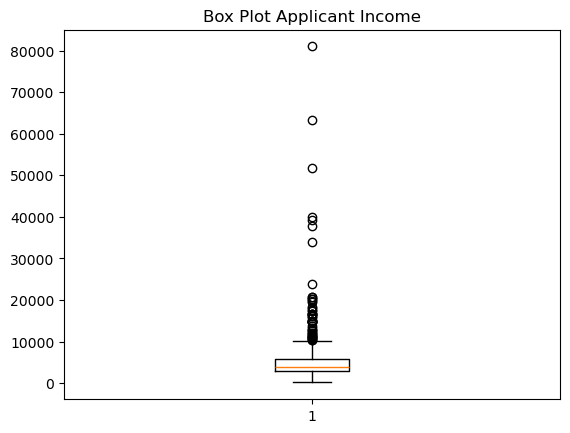

In [105]:
plt.boxplot(df.ApplicantIncome)
plt.title("Box Plot Applicant Income")
plt.show()

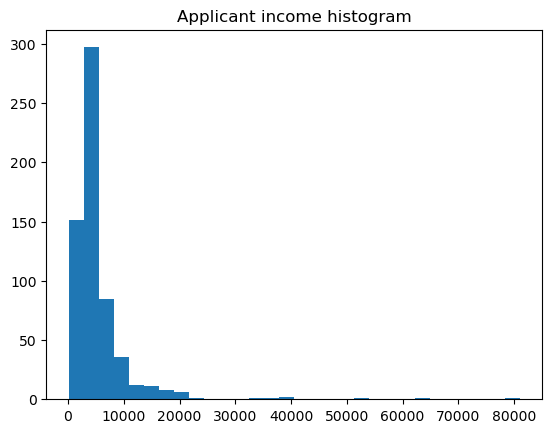

In [106]:
plt.hist(df['ApplicantIncome'], bins=30)
plt.title("Applicant income histogram")
plt.show()

In [107]:
## using mean and std deviation

mean=df[col].mean()
std=df[col].std()

lower_limit= mean-3*std
upper_limit= mean+3*std

std_outliers=df[ (df[col]<lower_limit) | (df[col]>upper_limit) ]

print(std_outliers.ApplicantIncome)

126    23803
155    39999
171    51763
183    33846
185    39147
333    63337
409    81000
443    37719
Name: ApplicantIncome, dtype: int64


### handling categorical data

In [108]:
## nominal for no order, ordinal includes hirarchey, binary (male, femal, yes/no)- label or binary mao

In [109]:
df.Gender

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

#### Lable Encoding
use when column has two values

In [110]:
from sklearn.preprocessing import LabelEncoder

lc= LabelEncoder()

df.Gender=lc.fit_transform(df.Gender)

In [111]:
df.Gender

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

#### One hot encoding for nominal values

use pd.get_dummies to convert for ordinal data

In [112]:
df.Education

0          Graduate
1          Graduate
2          Graduate
3      Not Graduate
4          Graduate
           ...     
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, Length: 614, dtype: object

In [113]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [114]:
df1=pd.get_dummies(df['Education'], prefix='Education', dtype=int)
df1

,Education_Graduate,Education_Not Graduate
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
609,1,0
610,1,0
611,1,0
612,1,0


In [115]:
pd.concat([df,df1], axis=1).drop(['Education','Education_Graduate'], axis=1)
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)', 'Capped_ApplicantIncome',
       'Median_Replaced_ApplicantIncome', 'zscore'],
      dtype='object')

In [116]:
### using map for many columns

In [117]:
df.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [118]:
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df.Dependents.value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [123]:
df.rename(columns={'Loan_Status (Approved)':'Loan_Approved'}, inplace=True)

In [124]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved,Capped_ApplicantIncome,Median_Replaced_ApplicantIncome,zscore
0,LP001002,1,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,5849.0,0.072991
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4583.0,4583.0,-0.134412
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,3000.0,-0.393747
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2583.0,2583.0,-0.462062
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,6000.0,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,2900.0,-0.410130
610,LP002979,1,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,4106.0,-0.212557
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8072.0,8072.0,0.437174
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,7583.0,0.357064


In [125]:
lc=LabelEncoder()
df['Loan_Approved']=lc.fit_transform(df['Loan_Approved'])
df['Loan_Approved']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Approved, Length: 614, dtype: int64

#### ordinal Encoding

In [126]:
# rural<semiurban<urban
from sklearn.preprocessing import OrdinalEncoder
order=[['Rural','Semiurban','Urban']]

oc=OrdinalEncoder(categories=order)
df['Property_Area']= oc.fit_transform(df[['Property_Area']])
df.Property_Area.value_counts()

Property_Area
1.0    233
2.0    202
0.0    179
Name: count, dtype: int64

In [127]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved,Capped_ApplicantIncome,Median_Replaced_ApplicantIncome,zscore
0,LP001002,1,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,2.0,1,5849.0,5849.0,0.072991
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,0,4583.0,4583.0,-0.134412
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,1,3000.0,3000.0,-0.393747
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,1,2583.0,2583.0,-0.462062
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,1,6000.0,6000.0,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,0.0,1,2900.0,2900.0,-0.410130
610,LP002979,1,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,0.0,1,4106.0,4106.0,-0.212557
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,2.0,1,8072.0,8072.0,0.437174
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,2.0,1,7583.0,7583.0,0.357064


In [128]:
df.Self_Employed.value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [129]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

In [130]:
df.Self_Employed

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int64

#### one hot encoding code